In [1]:
import argparse
from typing import TextIO
import os
import csv
from typing import List
import numpy as np
import glob
import keras
from sklearn.externals import joblib
from keras import backend as K
from keras import regularizers, constraints, initializers, activations
from keras.engine.topology import Layer
import tensorflow as tf

import pandas as pd
import numpy as n
from numpy import genfromtxt

/home/markus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ls ../data/non_seen_pep/

non_seen_irt.npy           non_seen_pep_datafram.csvirt_train
non_seen_irt_1.npy         non_seen_pep_datafram.csvseq_train
non_seen_irt_2.npy         non_seen_pep_datafram_2.csv
non_seen_pep.csv           non_seen_pep_datafram_2.csvirt_train
non_seen_pep.npy           non_seen_pep_datafram_2.csvseq_train
non_seen_pep_1.npy         non_seen_pep_prosit.csv
non_seen_pep_2.npy         non_seen_pep_prosit_1.csv
non_seen_pep_datafram.csv  non_seen_pep_prosit_2.csv


In [3]:
pred_prosit = genfromtxt("../Prosit/predict/new_data_tensor_irt_predicted.csv")
y_test_prosit = np.load("../data/non_seen_pep/non_seen_irt.npy")


In [4]:
def t95(y_emp, y_pred,x):
    if x ==0:
        n = int(np.floor(len(y_emp)*x))
    else:
        n = int(np.floor(len(y_emp)*x)) -1 
    dif = abs(y_emp.flatten() - y_pred.flatten())
    sort_dif = np.sort(dif.flatten())
    t_p = 2 * sort_dif[n] /  (max(y_emp) - min(y_emp)) * 100
    return t_p

In [5]:
t95(y_test_prosit, pred_prosit,0.95)

array([31.86891256])

In [16]:
len(y_test_prosit)

15678

In [6]:
#steps = np.linspace(0,1,100)

In [7]:
#t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]

In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ls ../HydraMethod/models/

LRF_model.h5    all_data.h5    best_model/   hydra_new.yaml  hydra_new_C.yaml
LRF_model.json  all_data.yaml  hydra_new.h5  hydra_new_C.h5


In [10]:
from keras.models import model_from_yaml
from modelArchitecture.Attention import Attention
yaml_file = open('../HydraMethod/models/all_data.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()

model = model_from_yaml(loaded_model_yaml,
                            custom_objects={
                                            'Attention': Attention})
model.load_weights('../HydraMethod/models/all_data.h5')

In [11]:
from utils import split_data, translate, save_model, standardize, result
PATH = "../data/non_seen_pep/non_seen_pep_datafram.csv"
splitter = split_data(PATH, PATH, train_size=0.99)
x_train, y_train = splitter.split()

15678


In [12]:
translater = translate()
x_train = translater.translate(x_train)
y_train_hydra = standardize(y_train)

In [13]:
from HydraMethod import HydraMethod
from modelArchitecture.ResnetRnnDense import ResnetRnnDense
hydra = HydraMethod(ResnetRnnDense(), 4)

In [14]:
pred_hydra = model.predict(hydra.get_all_representation(x_train))

In [15]:
t95(y_train_hydra, pred_hydra,0.95)

array([23.7569115])

In [17]:
steps = np.linspace(0.05,1,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_train_hydra, pred_hydra,n) for n in steps]

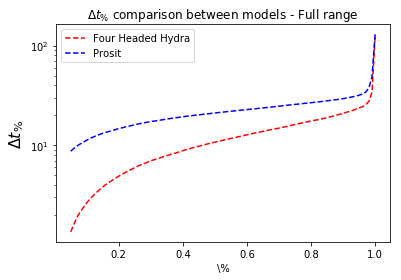

In [18]:
plt.plot(steps,t_four,linestyle = '--',color="red",label="Four Headed Hydra")
plt.plot(steps,t_prosit,linestyle = '--',color="blue",label="Prosit")
plt.yscale("log")
plt.yscale("log")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)
plt.title(r'$\Delta$$t_{\%}$ comparison between models - Full range')
plt.legend()
plt.savefig("t95_full")

In [25]:
pred_prosit = genfromtxt("../Prosit/predict/new_data_tensor_2_irt_predicted.csv")
y_test_prosit = np.load("../data/non_seen_pep/non_seen_irt_2.npy")


In [26]:
t95(y_test_prosit, pred_prosit,0.95)

array([22.45996909])

In [28]:
from utils import split_data, translate, save_model, standardize, result
PATH = "../HydraMethod/data/non_seen_pep/non_seen_pep_datafram_2.csv"
splitter = split_data(PATH, PATH, train_size=0.99)
x_train, y_train = splitter.split()

12634


In [29]:
translater = translate()
x_train = translater.translate(x_train)
y_train_hydra = standardize(y_train)

In [30]:
from HydraMethod import HydraMethod
from modelArchitecture.ResnetRnnDense import ResnetRnnDense
hydra = HydraMethod(ResnetRnnDense(), 4)

In [31]:
pred_hydra = model.predict(hydra.get_all_representation(x_train))

In [32]:
t95(y_train_hydra, pred_hydra,0.95)

array([20.36492142])

In [33]:
steps = np.linspace(0.05,1,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_train_hydra, pred_hydra,n) for n in steps]

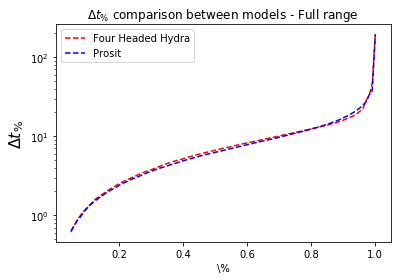

In [34]:
plt.plot(steps,t_four,linestyle = '--',color="red",label="Four Headed Hydra")
plt.plot(steps,t_prosit,linestyle = '--',color="blue",label="Prosit")
plt.yscale("log")
plt.yscale("log")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)
plt.title(r'$\Delta$$t_{\%}$ comparison between models - Full range')
plt.legend()
plt.savefig("t95_full")

In [35]:
steps = np.linspace(0.4,0.95,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_train_hydra, pred_hydra,n) for n in steps]

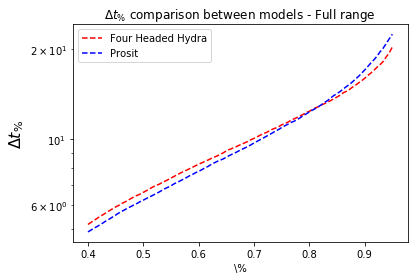

In [36]:
plt.plot(steps,t_four,linestyle = '--',color="red",label="Four Headed Hydra")
plt.plot(steps,t_prosit,linestyle = '--',color="blue",label="Prosit")
plt.yscale("log")
plt.yscale("log")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)
plt.title(r'$\Delta$$t_{\%}$ comparison between models - Full range')
plt.legend()
plt.savefig("t95_full")

In [ ]:
from utils import split_data, translate, save_model, standardize, result
PATH = "../data/non_seen_pep/non_seen_pep_datafram_2.csv"
splitter = split_data(PATH, PATH, train_size=0.99)
x_train, y_train = splitter.split()

In [ ]:
pred_four_head = four_heads.predict([X_forward_pre_test, X_backward_pre_test, X_forward_post_test, X_backward_post_test])
pred_one_head = one_head.predict([X_forward_pre_test])
pred_two_head = two_head.predict([X_forward_pre_test,X_backward_pre_test])
pred_three_head = three_head.predict([X_forward_pre_test,X_backward_pre_test,X_forward_post_test])

In [ ]:
steps = np.linspace(0.05,0.95,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_test_std, pred_four_head,n) for n in steps]
t_one = [t95(y_test_std, pred_one_head,n) for n in steps]
t_two = [t95(y_test_std, pred_two_head,n) for n in steps]
t_three = [t95(y_test_std, pred_three_head,n) for n in steps]

In [ ]:
plt.plot(steps,t_four,linestyle = '--',color="red",label="Three Headed Hydra")
plt.plot(steps,t_one,linestyle = '--',color="green",label="One Headed Hydra")
plt.plot(steps,t_two,linestyle = '--',color="black",label="Two Headed Hydra")
plt.plot(steps,t_prosit,linestyle = '--',color="blue",label="Prosit")
plt.plot(steps,t_three,linestyle = '--',color="yellow",label="Four Headed Hydra")
plt.yscale("log")
plt.yscale("log")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)
plt.title(r'$\Delta$$t_{\%}$ comparison between models - Full range')
plt.legend()
plt.savefig("t95_full")

In [ ]:
steps = np.linspace(0.2,.9,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_test_std, pred_four_head,n) for n in steps]
t_one = [t95(y_test_std, pred_one_head,n) for n in steps]
t_two = [t95(y_test_std, pred_two_head,n) for n in steps]
t_three = [t95(y_test_std, pred_three_head,n) for n in steps]

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(steps,t_four,linestyle = '--',color="red",label="Three Headed Hydra")
plt.plot(steps,t_one,linestyle = '--',color="green",label="One Headed Hydra")
plt.plot(steps,t_two,linestyle = '--',color="black",label="Two Headed Hydra")
plt.plot(steps,t_prosit,linestyle = '--',color="blue",label="Prosit")
plt.plot(steps,t_three,linestyle = '--',color="yellow",label="Four Headed Hydra")
plt.title(r'$\Delta$$t_{\%}$ comparison between models - Zoomed in')
plt.yscale("log")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)
plt.legend()
plt.savefig("t95_zoom")

In [ ]:
t_prosit

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
steps = np.linspace(0,.95,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_test_std, pred_four_head,n) for n in steps]
t_one = [t95(y_test_std, pred_one_head,n) for n in steps]
#plt.xlabel("%")
#plt.xlabel("t%")
procent = steps * 100
plt.plot(steps,t_four,color="red")
plt.plot(steps,t_one,color="green")
plt.plot(steps,t_prosit,color="blue")
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
steps = np.linspace(0.4,.9,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_four = [t95(y_test_std, pred_four_head,n) for n in steps]
t_one = [t95(y_test_std, pred_one_head,n) for n in steps]
#plt.xlabel("%")
#plt.xlabel("t%")
procent = steps * 100
plt.plot(steps,t_four,color="red")
plt.plot(steps,t_one,color="green")
plt.plot(steps,t_prosit,color="blue")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'\%')
plt.ylabel(r'$\Delta$$t_{\%}$',fontsize=16)

In [ ]:
steps = np.linspace(0.65,.95,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_model = [t95(y_test_std, pred_moel,n) for n in steps]
plt.plot(steps,t_model,color="red")
plt.plot(steps,t_prosit,color="blue")

In [ ]:
steps = np.linspace(0.6,.8,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_model = [t95(y_test_std, pred_moel,n) for n in steps]
plt.plot(steps,t_model,color="red")
plt.plot(steps,t_prosit,color="blue")

In [ ]:
steps = np.linspace(0.8,.95,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_model = [t95(y_test_std, pred_moel,n) for n in steps]
plt.plot(steps,t_model,color="red")
plt.plot(steps,t_prosit,color="blue")

In [ ]:
steps = np.linspace(0.95,1,100)
t_prosit = [t95(y_test_prosit, pred_prosit,n) for n in steps]
t_model = [t95(y_test_std, pred_moel,n) for n in steps]
plt.plot(steps,t_model,color="red")
plt.plot(steps,t_prosit,color="blue")